# Projeto Sistemas Inteligentes: Predicting a breast cancer using AI

## The group

The group is composed of:

| Student                        | RA          |
| -----------------------------  | ----------- |
| Lucas Jean Emmanuel Gauvain    | 13202421943 |
| Adinan Alves de Brito Filho    | 11201920527 |
| João Pedro Sousa Santos        | 11202021260 |


## Project presentation

### Description

The goal of this project is to help a doctor to diagnosis a breast cancer. We will create two machine learning models in order to class our patient regarding if their tumors are malign or benign.

The impact of this project may be the detection in advance of a breast cancer and the production of a fast and accurate diagnosis.

### The dataset

To realise this project, we will use the [load_breast_cancer](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html) dataset available on the scikit website.

The <em>load_breast_cancer</em> dataset is a collection of 569 samples of breast cancer data, with 30 features each describing characteristics of cell nuclei present in breast cancer biopsies. These features include medical measurements and information like:
* Diagnosis (M = malignant, B = benign)
* Information for each cell nucleus:
 * radius (mean of distances from center to points on the perimeter)
 * texture (standard deviation of gray-scale values)
 * perimeter
 * area
 * smootness (local variation in radius lengths)
 * compactness (perimeter^2 / area - 1.0)
 * concavity (severity of concave portions of the contour)
 * concave points (number of concave portions of the contour)
 * symmetry
 * fractal dimension ("coastline approximation" -1)




## Developement

### The necessary data

First, we import and read the dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns = data.feature_names)
df["target"] = data.target
df.head() # print the 20 first lines

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


We print the info about the dataframe

In [ ]:
info = df.info()
#print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In order to understand a little better the dataset we are working with, let's see how many malign and benign diagnosis are present:

In [ ]:
df["target"].value_counts()

,count
target,
1,357
0,212


We can see that the <em>load_breast_cancer</em> dataset contains **212 malign diagnosis** (target = 0) and **357 benign diagnosis** (target = 1), as explained [here](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html).

Let's plot a Pair Plot for Key Features. This plot show how selected features differ between classes (target = 0 or 1).

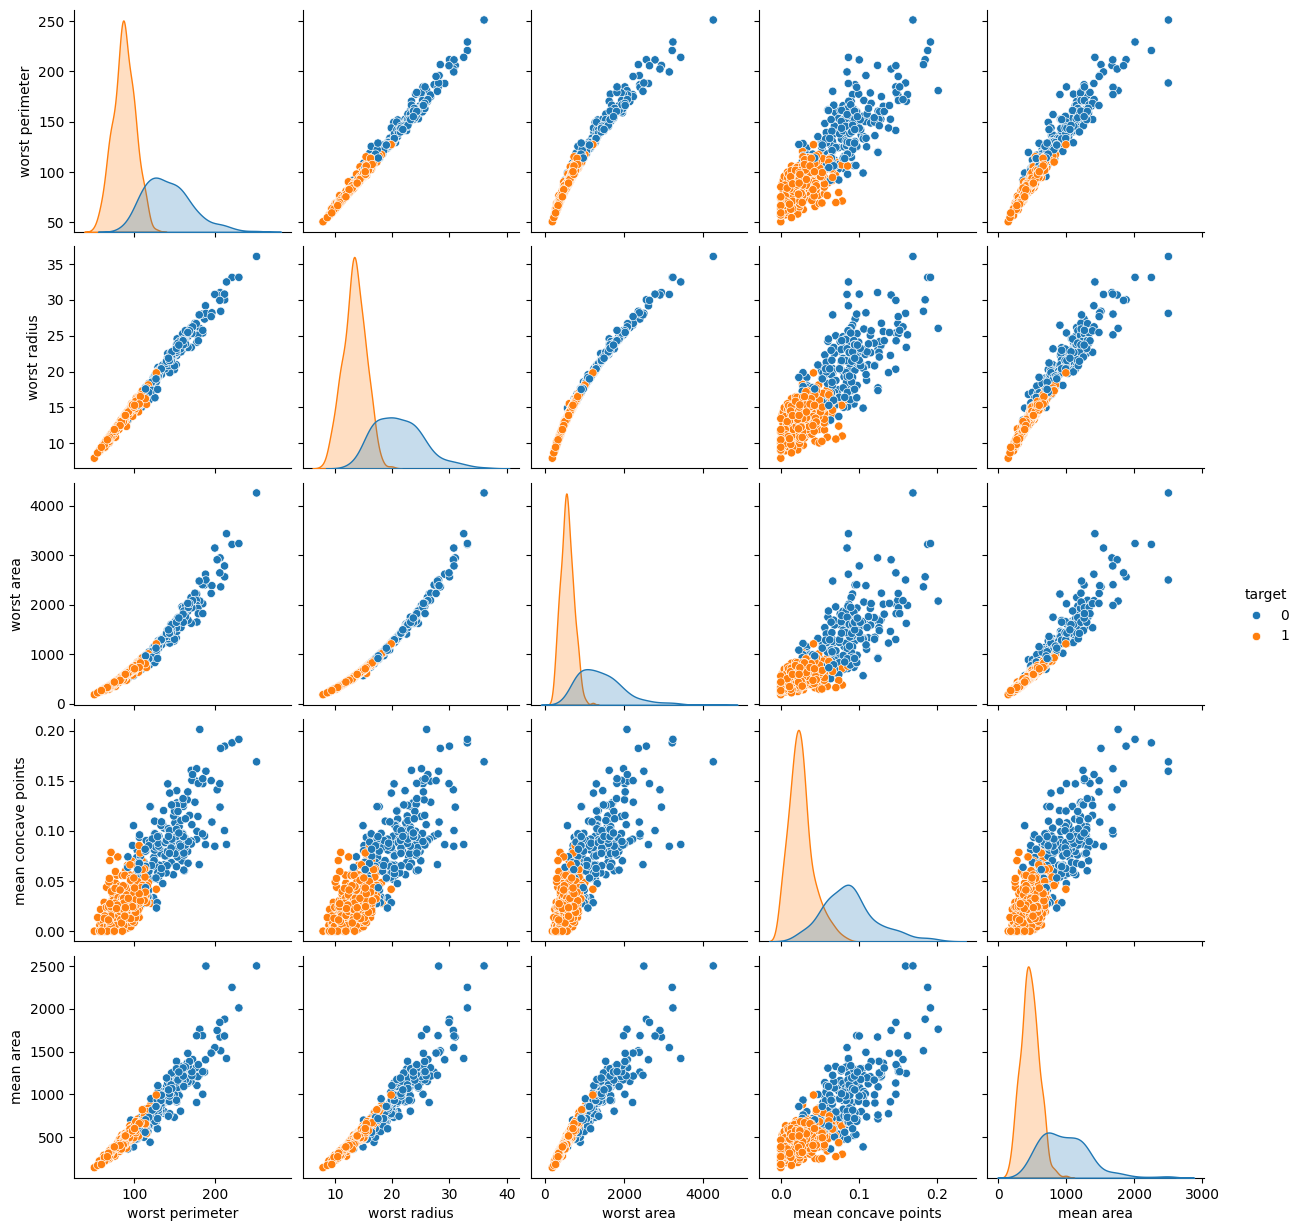

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

X = data.data
y = data.target

features = data.feature_names
df = pd.DataFrame(X, columns=features)
df['target'] = y

selected_features = ['worst perimeter', 'worst radius', 'worst area', 'mean concave points', 'mean area']
sns.pairplot(df, vars=selected_features, hue='target', palette='tab10')
plt.savefig("seaborn_plot.pdf", format='pdf')
plt.show()

### Machine learning

#### Explanations of the models

1. Random Forest Classifier

Random forests is an ensemble learning method for classification, regression and other tasks that works by creating a multitude of decision trees during training. For classification tasks, the output of the random forest is the class selected by most trees. Random forests correct for decision trees' habit of overfitting to their training set. In our classification problem, each tree votes whether it thinks the cancer scan is malignant (0) or benign (1), and the most popular answer is chosen as the final result.

<img src="https://miro.medium.com/v2/resize:fit:1010/1*R3oJiyaQwyLUyLZL-scDpw.png" width="400">

2. Linear SVC

Linear Support Vector Classification  (LinearSVC) is a powerful machine learning algorithm used for classification tasks. It’s an implementation of Support Vector Machine (SVM) that is specifically designed for handling linearly separable data. LinearSVC works by attempting to find a hyperplane in an N-dimensional space that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen. The objective of the SVM algorithm is to find a plane that has the maximum margin, i.e., the maximum distance between data points of both classes.

<img src="https://media.licdn.com/dms/image/D4D12AQHBV_LWUiyWzQ/article-cover_image-shrink_720_1280/0/1701290431943?e=2147483647&v=beta&t=cpfiYIXBbGZFPbJw76kxRanCkT21C5wJTopcSGk0dHQ" width="400">


#### Look for the best settings

Firstly, let's use KFold to find which data split is going to give the best accuracy on our two models (RFC and SVM).

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize results
results_iterations_RFC = []
results_iterations_SVM = []

# KFold configuration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Variables to store the best models
best_rfc_model = None
best_svm_model = None
best_rfc_accuracy = 0
best_svm_accuracy = 0
best_rfc_fold = None
best_svm_fold = None

# Main loop
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for j in range(10):
        results_rfc = {}
        results_svm = {}

        # Define models with random_state=j
        RFC = RandomForestClassifier(random_state=j)
        SVM = LinearSVC(random_state=j, dual=False)

        # Train the models
        modele_rfc = RFC.fit(X_train, y_train)
        modele_svm = SVM.fit(X_train, y_train)

        # Evaluate Random Forest
        y_pred_rfc = modele_rfc.predict(X_test)
        accuracy_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
        results_rfc['fold'] = i + 1
        results_rfc['model_random_state'] = j
        results_rfc['model'] = "Random Forest"
        results_rfc['accuracy'] = accuracy_rfc
        results_rfc['r2'] = r2_score(y_test, y_pred_rfc)

        # Save the best Random Forest model
        if accuracy_rfc > best_rfc_accuracy:
            best_rfc_accuracy = accuracy_rfc
            best_rfc_model = modele_rfc
            best_rfc_fold = (X_train, y_train, X_test, y_test)  # Save the test data for confusion matrix

        # Evaluate SVM
        y_pred_svm = modele_svm.predict(X_test)
        accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
        results_svm['fold'] = i + 1
        results_svm['model_random_state'] = j
        results_svm['model'] = "Support Vector Machine"
        results_svm['accuracy'] = accuracy_svm
        results_svm['r2'] = r2_score(y_test, y_pred_svm)

        # Save the best SVM model
        if accuracy_svm > best_svm_accuracy:
            best_svm_accuracy = accuracy_svm
            best_svm_model = modele_svm
            best_svm_fold = (X_train, y_train, X_test, y_test)  # Save the test data for confusion matrix

        # Store results
        results_iterations_RFC.append(results_rfc)
        results_iterations_SVM.append(results_svm)

Let's check the data partition and random state that led to the best model performance.

In [ ]:
from tabulate import tabulate

# Find the best results for each model
best_result_rfc = max(results_iterations_RFC, key=lambda x: x['accuracy'])
best_result_svm = max(results_iterations_SVM, key=lambda x: x['accuracy'])

# Display the best results
print("Best models configuration:")
print(tabulate(
    [
        [best_result_rfc['model'], best_result_rfc['fold'], best_result_rfc['model_random_state'], best_result_rfc['accuracy'],
        best_result_rfc['r2']],
        [best_result_svm['model'], best_result_svm['fold'], best_result_svm['model_random_state'], best_result_svm['accuracy'],
         best_result_svm['r2']]
    ],
    headers=["Model", "Fold", "Model Random State", "Accuracy", "R2 Score"],
    tablefmt="grid"
))

Best models configuration:
+------------------------+--------+----------------------+------------+------------+
| Model                  |   Fold |   Model Random State |   Accuracy |   R2 Score |
+========================+========+======================+============+============+
| Random Forest          |      2 |                    3 |   0.991228 |   0.959986 |
+------------------------+--------+----------------------+------------+------------+
| Support Vector Machine |      4 |                    0 |   0.982456 |   0.925319 |
+------------------------+--------+----------------------+------------+------------+


We can see that our two models (SVM and RFC) demonstrate strong performance with high accuracy. With an accuracy of 98% and 99%, we can realize that our two machine learning models show a strong accuracy on the determination if a tumor is malign or benign.

MSE (Mean Squared Error) measures the average squared difference between predicted and actual values. The R2 score indicates the proportion of variance explained by the model.

As we saw, the best model is **Random Forest**, with Fold #2 and Model Random State #3. The model is saved in the variable `best_rfc_model`.

### Data analyse with graphs

In [ ]:
# Random Forest data
X_train_rfc, y_train_rfc, X_test_rfc, y_test_rfc = best_rfc_fold
y_pred_rfc = best_rfc_model.predict(X_test_rfc)

# SVM data
X_train_svm, y_train_svm, X_test_svm, y_test_svm = best_svm_fold
y_pred_svm = best_svm_model.predict(X_test_svm)

Now, we can plot some graphs in order to help us to do the disgnosis with our machine learning models:

#### Decision tree

We can plot a decision tree, explaining how to determine if a tumor is malign or benign regarding some characteristics:

In [ ]:
from sklearn import tree

fn = data.feature_names
cn = data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,12), dpi=800)
tree.plot_tree(best_rfc_model.estimators_[0],
               feature_names = fn,
               class_names = cn,
               filled = True)
fig.savefig("rf_individualtree.pdf", format='pdf')

#### Confusion matrix

To compare RFC and SVM models, we can plot de confusion matrix of both of these models:

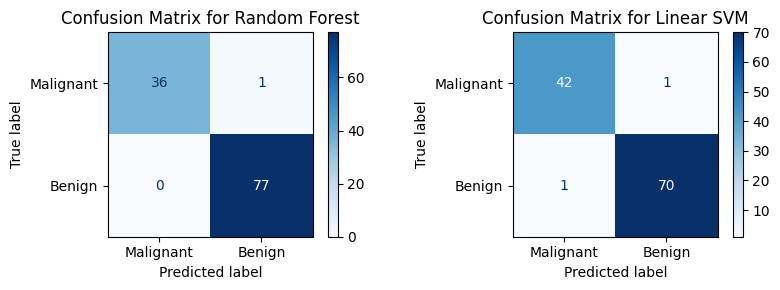

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_rfc = confusion_matrix(y_test_rfc, y_pred_rfc)
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)

fig, axes = plt.subplots(1, 2, figsize=(8.3, 3))

# RFC
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=['Malignant', 'Benign'])
disp_rfc.plot(cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title("Confusion Matrix for Random Forest")

# SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Malignant', 'Benign'])
disp_svm.plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title("Confusion Matrix for Linear SVM")

plt.tight_layout()
fig.savefig("confusionMatrix.pdf", format='pdf')
plt.show()

The confusion matrices show that the Random Forest model achieves near-perfect classification with only 1 false negative and no false positives. Meanwhile, the Support Vector Machine also performs well, with 1 false negativesand 1 false positive.

#### ROC curve

The ROC Curve (Receiver Operating Characteristic), show the trade-off between True Positive Rate (Sensitivity) and False Positive Rate at various thresholds. It's particularly useful for binary classification problems, which is our case on this project.

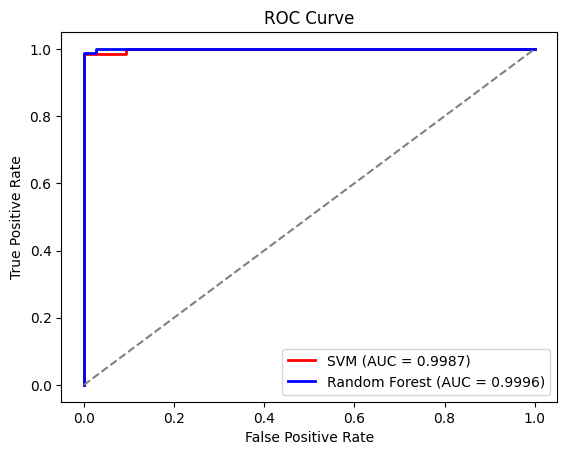

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for Random Forest and SVM
# Predict probabilities for Random Forest
if hasattr(best_rfc_model, 'predict_proba'):
    y_pred_proba_rfc = best_rfc_model.predict_proba(X_test_rfc)[:, 1]
else:
    y_pred_proba_rfc = best_rfc_model.decision_function(X_test_rfc)  # Decision function if proba not available
fpr_rfc, tpr_rfc, _ = roc_curve(y_test_rfc, y_pred_proba_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Predict decision function for SVM
if hasattr(best_svm_model, 'predict_proba'):
    y_pred_proba_svm = best_svm_model.predict_proba(X_test_svm)[:, 1]
else:
    y_pred_proba_svm = best_svm_model.decision_function(X_test_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test_svm, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curves
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f"SVM (AUC = {roc_auc_svm:.4f})")
plt.plot(fpr_rfc, tpr_rfc, color='blue', lw=2, label=f"Random Forest (AUC = {roc_auc_rfc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("rocCurve.pdf", format='pdf')
plt.show()



The ROC curve for the Random Forest model demonstrates almost perfect performance, with an AUC of 0.9996. This indicates that the model can distinguish the postive and the negative class' very well.

#### Features importances

Feature Importance is specific to the Random Forest model. It shows which features contribute most to the model's predictions.

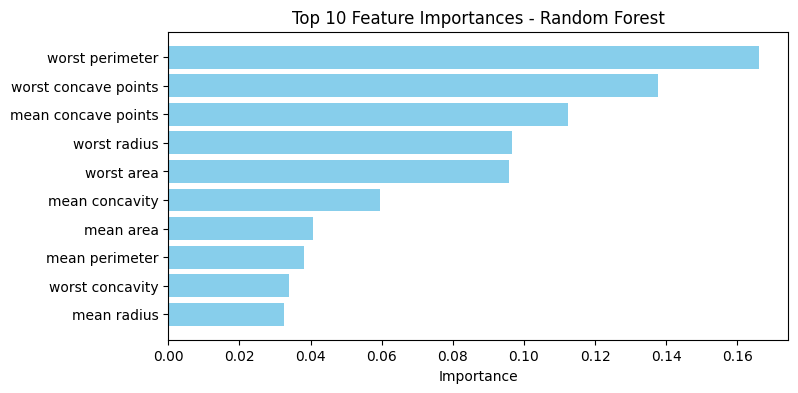

In [ ]:
feature_importances = best_rfc_model.feature_importances_
features = data.feature_names

# Sort feature importances
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_df['Feature'][:10], feature_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important at the top
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.savefig("featureImportance.pdf", format='pdf')
plt.show()

The `worst perimeter`, `worst concave points`, `mean concave points`, `worst radius` and `worst area` are the 5 most important characteristics for our model to do the predition.

## Conclusion

In this project, we developed and evaluated two classification models to determine whether tumors are malignant or benign: **Random Forest** and **Linear SVC**. By applying the K-Fold Cross-Validation method, we ensured that the models were tested on different subsets of the dataset, providing a more robust and generalizable evaluation.

The results demonstrated excellent model performance, with **accuracy close to 99% for Random Forest**, which stood out as the most accurate model. Metrics such as **Mean Squared Error (MSE)** and **ROC Curve** were used to validate the prediction efficiency, confirming the model's ability to minimize errors and explain data variance.

The success of **Random Forest** can be attributed to its robustness in handling complex data and its ability to correct the overfitting characteristic of individual decision trees. On the other hand, **Linear SVC** proved effective for linearly separable data but exhibited slightly lower performance compared to Random Forest.

Therefore, the **Random Forest** model was chosen as the best solution for the proposed task and can be applied as a reliable tool to assist in tumor classification, offering a fast and accurate approach for preliminary diagnoses.



## References:

https://colab.research.google.com/github/Coyote-Schmoyote/breast-cancer-clf-model/blob/main/breast_cancer.ipynb

https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.KFold.html

https://scikit-learn.org/1.5/modules/generated/sklearn.svm.LinearSVC.html

https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://seaborn.pydata.org/tutorial/introduction

https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html

https://scikit-learn.org/1.5/modules/tree.html

https://seaborn.pydata.org/tutorial/introduction

https://seaborn.pydata.org/tutorial/introduction

